## UNDERSTANDING THE PROBLEM

I have assumed the role of a Data Scientist hired by Microsoft. My task is to use the six provided datasets from the various Movie Database website found online in order to give them actionable insights on how to go about creating a new movie studio.

>  This will be done by giving an insight on the popular languages and whether to focus on Domestic market or World-wide market. 

> What is the best time of the month to release movies and the preferred length or movie length/duration

> The most popular genres.

# DATA UNDERSTANDING.



To make this stage easier i will define the functions below, but first i ave to import the relevant modules.

## Movie_budgets.csv.gz

In [1]:
#importing the relevant modules

#pandas
import pandas as pd

# matlab
import matplotlib.pyplot as plt

# to ensure all data visualizations appear on the same notebook and also stored here.
%matplotlib inline 

#seaborn
import seaborn as sns

#sqlite3
import sqlite3

#csv
import csv

#regex
import re

Below I will now define some **functions** to make Data understanding easier.

In [2]:
#let us define some functions to get relevant information from the Data Frames.

#get value types of entries per column.

def get_value(data,col_name):
    
    return data[col_name].value_counts()

#get information

def get_info(data):
    info_ = data.info()
    return info_

#Identify missing values

def missing_values(data):
    miss_vals = data.isnull().sum().sort_values(ascending=False)
    
    #percentages
    percentages = (((data.isnull().sum()) / len(data)).sort_values(ascending=False))*100
    
    #create dataframe of missing values
    
    missing_df = pd.DataFrame({"Total missing values": miss_vals, 'Percentage(%)':percentages})
    
    #if percentage == 0 implies no missing values
    missing_df.drop(missing_df[missing_df['Percentage(%)']==0].index, inplace = True)
    
    return missing_df

#get column names

def get_columns(data):
    columns = data.columns
    return columns

#defining a function for loading all columns from a table for Exploritory Data Analysis.

def load_SQL(column,table):
    
    data =pd.read_sql(f'''
                        SELECT {column}
                        FROM {table}
                        ''',conn)
    return data

    
# defining a function to look for duplicates from the DataFrames.

def get_duplicate(data):
    duplicate = data.duplicated().value_counts()
    return duplicate

#define a function that returns the unique values in a column.

def get_unique(data,column):
    return data[column].unique()

# Data Understanding.

##  ```"tn.movie_budgets.csv.gz"```

First file I shall load then explore is the ```'tn.movie_budgets.csv.gz'```.

In [3]:
# using pandas to load the file into budget_df


#compression is set to 'infer' to cater for its gz file compression type.

#index_col=0 to ensure data doesnt have more than one index column.

budget_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz',compression='infer',index_col=0)

#.head() allows us to preview the first five rows.
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [4]:
# getting info for the DataFrame "movie_budget_db"

get_info(budget_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   object
 3   domestic_gross     5782 non-null   object
 4   worldwide_gross    5782 non-null   object
dtypes: object(5)
memory usage: 271.0+ KB


In [5]:
#checking for duplicated data in budget_df

get_duplicate(budget_df)


False    5782
dtype: int64

In [6]:
#Visual inspection of the Column names to ensure there are no whitespaces.
get_columns(budget_df)


Index(['release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

### Understanding of budget_df.

The DataFrame has a total of **6** columns and **5782** rows.

The DataFrame has **no** missing value.

There are  data types in string form which will make 
it hard to sort them and use them for statistical analysis.
The problem columns are ```'production_budget'```,```'domestic_gross'``` and ```'worldwide_gross'```.

There are no duplicated data in the DataFrame as all the **5782** rows have no null data.

The column names are written with good syntax and easy to understand format.

I want to use the date column, so I will convert it to a datetype.



##  ```"rt.reviews.tsv.gz"```

In [7]:
#Using pandas to load the data into review_df.

#since its a tab separated value delimiter is set to '\t'.

#encoding is set to 'latin-1' as the defualt 'utf-8' is not working for the file type.

#compression is set to 'infer' to cater for its gz file compression type.




rt_movie_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter = '\t', encoding = 'latin-1',
                        compression='infer',index_col=0)

#.head() allows us to preview the first five rows.
rt_movie_df.head()

,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
id,,,,,,,,,,,
1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [8]:
#getting info on rt_movie_df
get_info(rt_movie_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1560 entries, 1 to 2000
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   synopsis      1498 non-null   object
 1   rating        1557 non-null   object
 2   genre         1552 non-null   object
 3   director      1361 non-null   object
 4   writer        1111 non-null   object
 5   theater_date  1201 non-null   object
 6   dvd_date      1201 non-null   object
 7   currency      340 non-null    object
 8   box_office    340 non-null    object
 9   runtime       1530 non-null   object
 10  studio        494 non-null    object
dtypes: object(11)
memory usage: 146.2+ KB


In [9]:
get_unique(rt_movie_df,'rating')

array(['R', 'NR', 'PG', 'PG-13', nan, 'G', 'NC17'], dtype=object)

In [10]:
#search for duplicate data

get_duplicate(rt_movie_df)

False    1556
True        4
dtype: int64

In [11]:
#looking at the column names.

get_columns(rt_movie_df)

Index(['synopsis', 'rating', 'genre', 'director', 'writer', 'theater_date',
       'dvd_date', 'currency', 'box_office', 'runtime', 'studio'],
      dtype='object')

In [12]:
#percentage of duplicated data

missing_values(rt_movie_df)

,Total missing values,Percentage(%)
currency,1220,78.205128
box_office,1220,78.205128
studio,1066,68.333333
writer,449,28.782051
theater_date,359,23.012821
dvd_date,359,23.012821
director,199,12.756410
synopsis,62,3.974359
runtime,30,1.923077
genre,8,0.512821


### Undestanding of rt_movie_df

Review_df has 1560 row entries and 11 columns.

Out of 1560 row entries it has 4 duplicates.

The column names are well written without any ambiguos symbols
or denotations, and no random whitespaces.

Missing values were observed as not all columns had the expected 1560 entries.
on further inspection the following had missing values;

        currency : 78.20 %
        box_office : 78.20%
        studio : 68.33%
        writer: 28.78%
        theater_date: 23.01%
        dvd_date : 23.01%
        director : 12.75%
        synopsis : 3.97%
        runtime : 1.92%
        genre : 0.51%
        rating :0.19%

## ```"rt.reviews.tsv.gz"```

In [13]:
#Using pandas to load the data into review_df.

#since its a tab separated value delimiter is set to '\t'.

#encoding is set to 'latin-1' as the defualt 'utf-8' is not working for the file type.

#compression is set to 'infer' to cater for its gz file compression type.




review_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', delimiter = '\t', encoding = 'latin-1',
                        compression='infer',index_col=0)

#.head() allows us to preview the first five rows.
review_df.head()

,review,rating,fresh,critic,top_critic,publisher,date
id,,,,,,,
3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [14]:
#getting info on review_df
get_info(review_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54432 entries, 3 to 2000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   review      48869 non-null  object
 1   rating      40915 non-null  object
 2   fresh       54432 non-null  object
 3   critic      51710 non-null  object
 4   top_critic  54432 non-null  int64 
 5   publisher   54123 non-null  object
 6   date        54432 non-null  object
dtypes: int64(1), object(6)
memory usage: 3.3+ MB


In [15]:
#search for duplicate data
get_duplicate(review_df)

False    52309
True      2123
dtype: int64

In [16]:
#looking at the column names.

get_columns(review_df)

Index(['review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [17]:
#percentage of duplicated data

missing_values(review_df)

,Total missing values,Percentage(%)
rating,13517,24.832819
review,5563,10.220091
critic,2722,5.000735
publisher,309,0.567681


In [18]:
#checking the unique value_count of the data under 'top_critic' column


get_value(review_df,'top_critic')

0    41336
1    13096
Name: top_critic, dtype: int64

In [19]:
#checking the unique values of the 'fresh' column


get_unique(review_df,'fresh')


array(['fresh', 'rotten'], dtype=object)

### Undestanding of review_df

Review_df has 54432 row entries and 8 columns.

Out of 54432 row entries it has 9 duplicates.

The column names are well written without any ambiguos symbols<br> or denotations, and no random whitespaces.

Missing values were observed as not all columns had the expected 54432 entries.<br>
on further inspection the following had missing values; <br>
> * `rating` : 24.83 %
> * `review` : 10.22%
> * `critic` :5.00%
> * `publisher` :0.56%

Looking further into the column `top_critic` and `fresh` reveals they only have two kinds of data entry.<br>
> `fresh` only has fresh or rotten.<br> 
> `top_critic` only has 0 or 1 meaning it is a bolleon data type.

further understanding through research is needed.

## ```"bom.movie_gross.csv.gz"```


In [20]:
#Using pandas to load the data into gross_df.

#encoding is set to 'latin-1' as the defualt 'utf-8' is not working for the file type.

#compression is set to 'infer' to cater for its gz file compression type.


gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz', encoding = 'latin-1',compression='infer')

gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [21]:
get_info(gross_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           3387 non-null   object 
 1   studio          3382 non-null   object 
 2   domestic_gross  3359 non-null   float64
 3   foreign_gross   2037 non-null   object 
 4   year            3387 non-null   int64  
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB


In [22]:
#missing values observed so checking for percentage of missing values per columns.

missing_values(gross_df)

,Total missing values,Percentage(%)
foreign_gross,1350,39.858282
domestic_gross,28,0.826690
studio,5,0.147623


In [23]:
#checking for duplicates.

get_duplicate(gross_df)

False    3387
dtype: int64

In [24]:
#checking column names.

get_columns(gross_df)

Index(['title', 'studio', 'domestic_gross', 'foreign_gross', 'year'], dtype='object')

In [25]:
#studio counts
get_unique(gross_df,'studio')

array(['BV', 'WB', 'P/DW', 'Sum.', 'Par.', 'Uni.', 'Fox', 'Wein.', 'Sony',
       'FoxS', 'SGem', 'WB (NL)', 'LGF', 'MBox', 'CL', 'W/Dim.', 'CBS',
       'Focus', 'MGM', 'Over.', 'Mira.', 'IFC', 'CJ', 'NM', 'SPC', 'ParV',
       'Gold.', 'JS', 'RAtt.', 'Magn.', 'Free', '3D', 'UTV', 'Rela.',
       'Zeit.', 'Anch.', 'PDA', 'Lorb.', 'App.', 'Drft.', 'Osci.', 'IW',
       'Rog.', nan, 'Eros', 'Relbig.', 'Viv.', 'Hann.', 'Strand', 'NGE',
       'Scre.', 'Kino', 'Abr.', 'CZ', 'ATO', 'First', 'GK', 'FInd.',
       'NFC', 'TFC', 'Pala.', 'Imag.', 'NAV', 'Arth.', 'CLS', 'Mont.',
       'Olive', 'CGld', 'FOAK', 'IVP', 'Yash', 'ICir', 'FM', 'Vita.',
       'WOW', 'Truly', 'Indic.', 'FD', 'Vari.', 'TriS', 'ORF', 'IM',
       'Elev.', 'Cohen', 'NeoC', 'Jan.', 'MNE', 'Trib.', 'Rocket',
       'OMNI/FSR', 'KKM', 'Argo.', 'SMod', 'Libre', 'FRun', 'WHE', 'P4',
       'KC', 'SD', 'AM', 'MPFT', 'Icar.', 'AGF', 'A23', 'Da.', 'NYer',
       'Rialto', 'DF', 'KL', 'ALP', 'LG/S', 'WGUSA', 'MPI', 'RTWC', 'FIP

### Understanding of gross_df

Missing values are obsereved. <br> 
Specifically in;<br>
    > * `foreign_gross`  : 39.85%<br>
    > * `domestic_gross`  : 0.82%<br>
    > * `studio`          : 0.14%
    

Also a column is a string data type instead of integer. `domestic_gross`

No duplicates in the data.<br>

Column names are well written in easy to understand manner.

Studio names are in abbreviations, i should research on their denotations.

## tmdb.movies.csv.gz

In [26]:
#Using pandas to load the data into tmdb_df.

#encoding is set to 'latin-1' as the defualt 'utf-8' is not working for the file type.

#compression is set to 'infer' to cater for its gz file compression type.

#index_col is set to 0 to remove extra index.


tmdb_df = pd.read_csv('zippedData/tmdb.movies.csv.gz', encoding = 'latin-1', compression='infer',index_col=0)

tmdb_df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [27]:
get_info(tmdb_df)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [28]:
get_duplicate(tmdb_df)

False    25497
True      1020
dtype: int64

In [29]:
#inspecting column names

get_columns(tmdb_df)

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

### Understanding tmdb_df.

No missing data.

Duplicates observed, 1020 in number.

index for columns should be changed from `unknown:` to avoid confusion in data interpretation.

questions i need to answer if i want to understand this data set.

What are genre_ids?
> * {"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}









## im.db with SQL.

In [30]:
# creating a connection to the sql database

conn = sqlite3.connect('zippedData/im.db')

In [31]:
#fetching all the names of the tables found in the database.
cursor_ = conn.cursor()

cursor_.execute("""
SELECT name
FROM sqlite_master
WHERE type ='table';
""")

table_names = cursor_.fetchall()
table_names

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

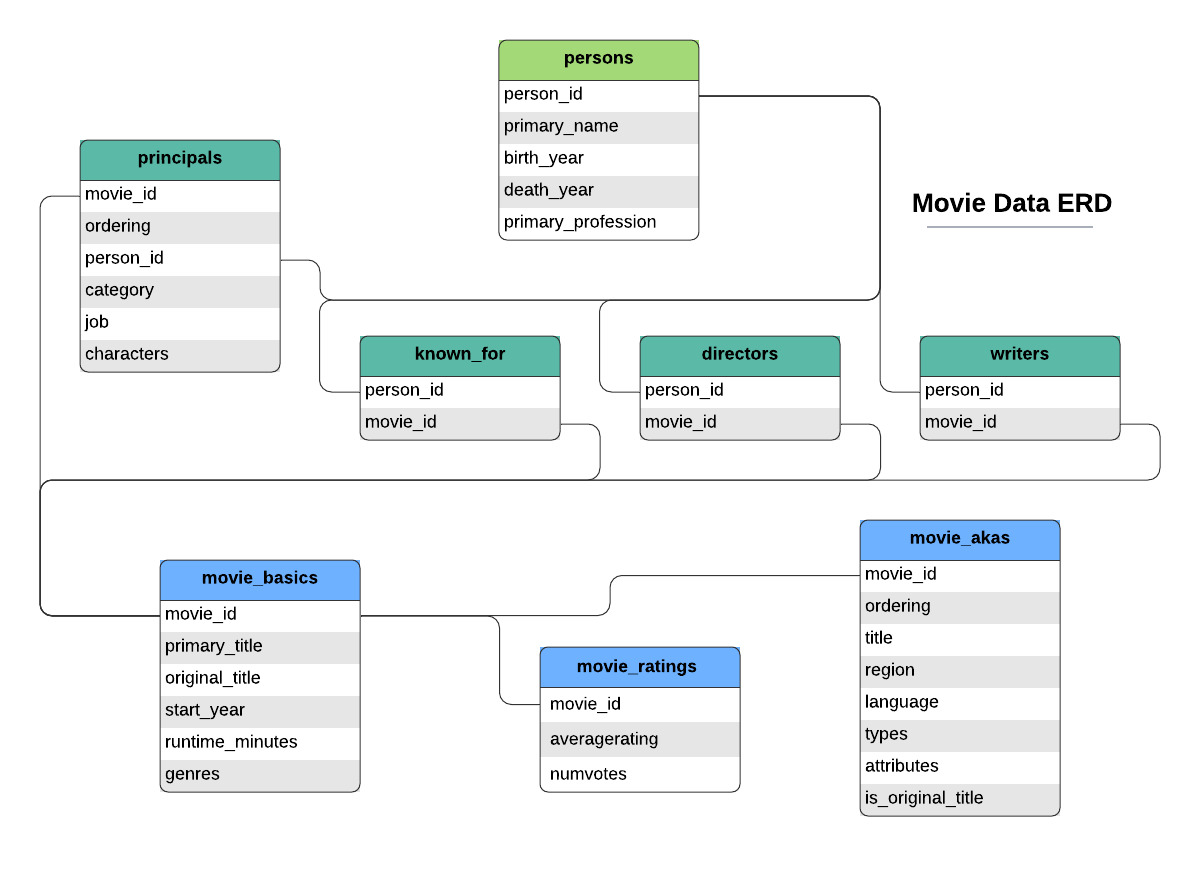

#### ```movie_basics```

In [32]:
# taking a look at the movie_basics table from the sql.
movie_basics_df = load_SQL('*','movie_basics')


movie_basics_df.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0069204,Sabse Bada Sukh,Sabse Bada Sukh,2018,NaN,"Comedy,Drama"
4,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"


In [33]:
# getting information on the movie_basics table

get_info(movie_basics_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146144 entries, 0 to 146143
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         146144 non-null  object 
 1   primary_title    146144 non-null  object 
 2   original_title   146123 non-null  object 
 3   start_year       146144 non-null  int64  
 4   runtime_minutes  114405 non-null  float64
 5   genres           140736 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 6.7+ MB


In [34]:
# missing values detected so we are checking the percentage of the missing values.
missing_values(movie_basics_df)

,Total missing values,Percentage(%)
runtime_minutes,31739,21.717621
genres,5408,3.700460
original_title,21,0.014369


In [35]:
# checking for duplicates.

get_duplicate(movie_basics_df)

False    146144
dtype: int64

#### Understanding movie_basics

No duplacated rows detected.

missing values observed <br>
> * runtime_minutes
> * genres
> * original_title

Movie_basics has **146144** row entries and **6** columns.

The column names are not ambiguous.

#### ```directors```

In [36]:
#using pandas to view the sql table.

directors_df = load_SQL('*','directors')

directors_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0462036,nm1940585
2,tt0835418,nm0151540
3,tt0835418,nm0151540
4,tt0878654,nm0089502


In [37]:
#getting information on the directors table.

get_info(directors_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 291174 entries, 0 to 291173
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   291174 non-null  object
 1   person_id  291174 non-null  object
dtypes: object(2)
memory usage: 4.4+ MB


In [38]:
#looking for duplicates
get_duplicate(directors_df)

False    163535
True     127639
dtype: int64

#### Understanding Directors.

The table consists of 2 columns and 291174 rows.<br>

The table comprises of primary and foreign keys.

It has no missing values.

It contains duplicate files, 127639 duplicates exactly.


#### ```known_for```

In [39]:
#using pandas to view the sql table 'known_for'

known_for_df = load_SQL('*','known_for')

known_for_df.head()

,person_id,movie_id
0,nm0061671,tt0837562
1,nm0061671,tt2398241
2,nm0061671,tt0844471
3,nm0061671,tt0118553
4,nm0061865,tt0896534


In [40]:
#getting information on the table.

get_info(known_for_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1638260 entries, 0 to 1638259
Data columns (total 2 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   person_id  1638260 non-null  object
 1   movie_id   1638260 non-null  object
dtypes: object(2)
memory usage: 25.0+ MB


In [41]:
#checking for duplicates

get_duplicate(known_for_df)

False    1638260
dtype: int64

#### Understanding known_for.

No Missing data or Duplicates observed.

The table has 1638260 row entries and 2 columns

#### ```movies_akas```

In [42]:
#using pandas to load the sql table.

movie_akas_df = load_SQL('*','movie_akas')


movie_akas_df.head()

,movie_id,ordering,title,region,language,types,attributes,is_original_title
0,tt0369610,10,Джурасик свят,BG,bg,None,None,0.0
1,tt0369610,11,Jurashikku warudo,JP,None,imdbDisplay,None,0.0
2,tt0369610,12,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0
3,tt0369610,13,O Mundo dos Dinossauros,BR,None,None,short title,0.0
4,tt0369610,14,Jurassic World,FR,None,imdbDisplay,None,0.0


In [43]:
#observing language Value count.

movie_akas_df['language'].value_counts().sort_values(ascending=False).head(30)

en     22895
tr      3847
bg      3609
fr      3576
he      2680
sv       965
cmn      727
fa       482
hi       307
yue      286
ca       239
es       223
ta       221
ml       207
te       178
hr       151
de       131
ar        98
bs        97
nl        84
bn        61
id        56
th        55
it        50
tl        45
sr        45
qbp       42
qbn       35
kn        29
mr        23
Name: language, dtype: int64

In [44]:
#getting info of the table.
get_info(movie_akas_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 331703 entries, 0 to 331702
Data columns (total 8 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   movie_id           331703 non-null  object 
 1   ordering           331703 non-null  int64  
 2   title              331703 non-null  object 
 3   region             278410 non-null  object 
 4   language           41715 non-null   object 
 5   types              168447 non-null  object 
 6   attributes         14925 non-null   object 
 7   is_original_title  331678 non-null  float64
dtypes: float64(1), int64(1), object(6)
memory usage: 20.2+ MB


In [45]:
movie_akas_df['is_original_title'].value_counts()

0.0    286978
1.0     44700
Name: is_original_title, dtype: int64

In [46]:
#missing data observed , looking for there percentages per column.

missing_values(movie_akas_df)

,Total missing values,Percentage(%)
attributes,316778,95.500493
language,289988,87.423991
types,163256,49.217523
region,53293,16.066481
is_original_title,25,0.007537


In [47]:
#looking for duplicate files.

get_duplicate(movie_akas_df)

False    331703
dtype: int64

#### Understanding movies_akas.

It has no duplicate values.<br>

The table has 331703 row entries and 8 columns.

Some columns namely;<br>
> * attributes  : 95.55 %  
> * language     : 87.42 %
> * types       : 49.21 %
> * region       : 16.06 %
> * is_original_title : 0.000075%


The is_original_title column is a boleon data type hence the ones and zeros.

#### ```movie_ratings```

In [48]:
# Using pandas to open/load the sql table.

movie_ratings_df = load_SQL('*','movie_ratings')

movie_ratings_df.head()

,movie_id,averagerating,numvotes
0,tt10356526,8.3,31
1,tt10384606,8.9,559
2,tt1042974,6.4,20
3,tt1043726,4.2,50352
4,tt1060240,6.5,21


In [49]:
#getting info on the dataframe of 'movie_ratings'.

get_info(movie_ratings_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 73856 entries, 0 to 73855
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   movie_id       73856 non-null  object 
 1   averagerating  73856 non-null  float64
 2   numvotes       73856 non-null  int64  
dtypes: float64(1), int64(1), object(1)
memory usage: 1.7+ MB


In [50]:
# Looking for duplicates

get_duplicate(movie_ratings_df)

False    73856
dtype: int64

#### Understanding movie_ratings sql

The table contains 73856 entries and 3 columns.<br>
It does not have any missing data or duplicates.

#### ```writers```

In [51]:
# Using pandas to load the data.

writers_df = load_SQL('*','writers')

writers_df.head()

,movie_id,person_id
0,tt0285252,nm0899854
1,tt0438973,nm0175726
2,tt0438973,nm1802864
3,tt0462036,nm1940585
4,tt0835418,nm0310087


In [52]:
#looking for information on the table.

get_info(writers_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255873 entries, 0 to 255872
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   movie_id   255873 non-null  object
 1   person_id  255873 non-null  object
dtypes: object(2)
memory usage: 3.9+ MB


In [53]:
#looking for duplicates in the table.

get_duplicate(writers_df)

False    178352
True      77521
dtype: int64

#### Understanding the writers_df table.

No missing values observed.<br>

the table contains 255873 row entries and 2 columns.

The table has 77521 duplicates.

#### ```principals```

In [54]:

#using pandas to load the data.

principals_df = load_SQL('*','principals')

principals_df.head(20)

,movie_id,ordering,person_id,category,job,characters
0,tt0111414,1,nm0246005,actor,None,"[""The Man""]"
1,tt0111414,2,nm0398271,director,None,None
2,tt0111414,3,nm3739909,producer,producer,None
3,tt0323808,10,nm0059247,editor,None,None
4,tt0323808,1,nm3579312,actress,None,"[""Beth Boothby""]"
5,tt0323808,2,nm2694680,actor,None,"[""Steve Thomson""]"
6,tt0323808,3,nm0574615,actor,None,"[""Sir Lachlan Morrison""]"
7,tt0323808,4,nm0502652,actress,None,"[""Lady Delia Morrison""]"
8,tt0323808,5,nm0362736,director,None,None
9,tt0323808,6,nm0811056,producer,producer,None


In [55]:
get_info(principals_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028186 entries, 0 to 1028185
Data columns (total 6 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   movie_id    1028186 non-null  object
 1   ordering    1028186 non-null  int64 
 2   person_id   1028186 non-null  object
 3   category    1028186 non-null  object
 4   job         177684 non-null   object
 5   characters  393360 non-null   object
dtypes: int64(1), object(5)
memory usage: 47.1+ MB


In [56]:
get_value(principals_df,'job')

producer                   108168
screenplay                   8172
director of photography      6517
writer                       6479
co-director                  5796
                            ...  
novel Arlington Park            1
first story                     1
scenario revisions              1
poem by                         1
planning                        1
Name: job, Length: 2965, dtype: int64

In [57]:
#Missing values observed, checking for their percentages.
missing_values(principals_df)

,Total missing values,Percentage(%)
job,850502,82.718691
characters,634826,61.742331


In [58]:
#checking for duplicates.

get_duplicate(principals_df)

False    1028186
dtype: int64

#### Understanding principals_df

The table contains 1028186 row entries and 6 columns.<br>

Two columns are obseved with missing data;
> * ```job```  : 82.71%
> * ```characters``` : 61.74%

No duplicated data observed.

#### ```persons```

In [59]:
# Using pandas to open the sql table.

persons_df = load_SQL('*','persons')

persons_df.head()

,person_id,primary_name,birth_year,death_year,primary_profession
0,nm0061671,Mary Ellen Bauder,NaN,NaN,"miscellaneous,production_manager,producer"
1,nm0061865,Joseph Bauer,NaN,NaN,"composer,music_department,sound_department"
2,nm0062070,Bruce Baum,NaN,NaN,"miscellaneous,actor,writer"
3,nm0062195,Axel Baumann,NaN,NaN,"camera_department,cinematographer,art_department"
4,nm0062798,Pete Baxter,NaN,NaN,"production_designer,art_department,set_decorator"


In [60]:
#getting info on the DataFrames.

get_info(persons_df)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 5 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   person_id           606648 non-null  object 
 1   primary_name        606648 non-null  object 
 2   birth_year          82736 non-null   float64
 3   death_year          6783 non-null    float64
 4   primary_profession  555308 non-null  object 
dtypes: float64(2), object(3)
memory usage: 23.1+ MB


In [61]:
#missing values observed, checking for there percentage.

missing_values(persons_df)

,Total missing values,Percentage(%)
death_year,599865,98.881889
birth_year,523912,86.361778
primary_profession,51340,8.462898


In [62]:
# Checking for Duplicates.
get_duplicate(persons_df)

False    606648
dtype: int64

#### Understanding persons_df

The dataframe has 606648 row entries and 5 columns. <br>

It contains missing values namely;
> * ```death_year```  : 98.88 %
> * ```birth_year```  : 86.36 %
> * ```primary_profession```  : 8.46 %

It has no Duplicates.

# DATA PREPARATION.

 ## DATA CLEANING

In this part of the project I will be selecting the data i will use and clean them accordingly before Analysing them.


## ```"budget_df"("tn.movie_budgets.csv.gz")```

The DataFrame had no missing values or duplicated rows.<br>

The only issue was that some column data types were in string form,<br>
which will make it hard to sort them and use them for statistical analysis.<br>

The problem columns are; 
> * 'production_budget'
> * 'domestic_gross'
> * 'worldwide_gross'.

In [63]:
# Start by defining a type casting function for any column of numerical data stored as a string.

def int_conv(data,col_name):
    #first we remove the $ sign for the typecasting to work.
    data[col_name] = data[col_name].map(lambda col: re.sub('[^0-9]','', col))
    
    #then we convert/typecast.
    data[col_name] = data[col_name].astype(int)
    return data[col_name]

# Define a function to deal with duplicates.
def remove_dup(data):
    data.drop_duplicates(keep = 'first', inplace = True)
    return data

# Define a function that gives a Summary of Statistics
def Stat_summary(data):
    return data.describe()

In [64]:
# Now cleaning the budget_df("tn.movie_budgets.csv.gz")

#Starting with 'production_budget' 
int_conv(budget_df,'production_budget')

id
1     425000000
2     410600000
3     350000000
4     330600000
5     317000000
        ...    
78         7000
79         6000
80         5000
81         1400
82         1100
Name: production_budget, Length: 5782, dtype: int64

In [65]:
#Type casting 'domestic_gross'

int_conv(budget_df,'domestic_gross')

id
1     760507625
2     241063875
3      42762350
4     459005868
5     620181382
        ...    
78            0
79        48482
80         1338
81            0
82       181041
Name: domestic_gross, Length: 5782, dtype: int64

In [66]:
# Typecasting 'worldwide_gross'

int_conv(budget_df,'worldwide_gross')

id
1     2776345279
2     1045663875
3      149762350
4     1403013963
5     1316721747
         ...    
78             0
79        240495
80          1338
81             0
82        181041
Name: worldwide_gross, Length: 5782, dtype: int64

In [67]:
# Checking if the non-numerical symbols were removed.

budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross
id,,,,,
1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [68]:
# Type Casting from object to int64, Succesfull.
get_info(budget_df)


<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 1 to 82
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   release_date       5782 non-null   object
 1   movie              5782 non-null   object
 2   production_budget  5782 non-null   int64 
 3   domestic_gross     5782 non-null   int64 
 4   worldwide_gross    5782 non-null   int64 
dtypes: int64(3), object(2)
memory usage: 271.0+ KB


In [69]:
#convert date to a date time format to make it easier to make new columns based on year and column.
budget_df['release_date'] = pd.to_datetime(budget_df['release_date'])

#checking to comfirm the change was succesfull
budget_df['release_date'].head()

id
1   2009-12-18
2   2011-05-20
3   2019-06-07
4   2015-05-01
5   2017-12-15
Name: release_date, dtype: datetime64[ns]

## ```tmdb.movies.csv.gz(tmdb_df)```

  

The tmdb_df Data Frame has the following issues;

    Deal with Duplicates.

    What are genre_ids, what do those numbers represent for now they are too ambiguous.    
    but after researching from there website i now have their meanings.
    
    [{"genres":[{"id":28,"name":"Action"},{"id":12,"name":"Adventure"},{"id":16,"name":"Animation"},{"id":35,"name":"Comedy"},{"id":80,"name":"Crime"},{"id":99,"name":"Documentary"},{"id":18,"name":"Drama"},{"id":10751,"name":"Family"},{"id":14,"name":"Fantasy"},{"id":36,"name":"History"},{"id":27,"name":"Horror"},{"id":10402,"name":"Music"},{"id":9648,"name":"Mystery"},{"id":10749,"name":"Romance"},{"id":878,"name":"Science Fiction"},{"id":10770,"name":"TV Movie"},{"id":53,"name":"Thriller"},{"id":10752,"name":"War"},{"id":37,"name":"Western"}]}]


In [70]:
# Removing the Duplicates

remove_dup(tmdb_df)

# Checking if the Duplicates were succesfully removed 
get_duplicate(tmdb_df)

False    25497
dtype: int64

In [71]:
#dropping rows with an empty genre_id ([]) as they dont serve any function without the genre_id.

tmdb_df = tmdb_df[tmdb_df.genre_ids != '[]']

## ```im.db.SQL```

### movie_basics_df

No duplacated rows detected.

missing values observed

        runtime_minutes
        genres
        original_title

Movie_basics has 146144 row entries and 6 columns.

The column names are not ambiguous.

In [72]:
#dealing with missing values by dropping all rows with missing data.
q = """
SELECT *
FROM movie_basics 
WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL and original_title IS NOT NULL
"""

movie_basics = pd.read_sql(q,conn)
movie_basics

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt0063540,Sunghursh,Sunghursh,2013,175.0,"Action,Crime,Drama"
1,tt0066787,One Day Before the Rainy Season,Ashad Ka Ek Din,2019,114.0,"Biography,Drama"
2,tt0069049,The Other Side of the Wind,The Other Side of the Wind,2018,122.0,Drama
3,tt0100275,The Wandering Soap Opera,La Telenovela Errante,2017,80.0,"Comedy,Drama,Fantasy"
4,tt0111414,A Thin Life,A Thin Life,2018,75.0,Comedy
...,...,...,...,...,...,...
112227,tt9916160,Drømmeland,Drømmeland,2019,72.0,Documentary
112228,tt9916170,The Rehearsal,O Ensaio,2019,51.0,Drama
112229,tt9916186,Illenau - die Geschichte einer ehemaligen Heil...,Illenau - die Geschichte einer ehemaligen Heil...,2017,84.0,Documentary
112230,tt9916190,Safeguard,Safeguard,2019,90.0,"Drama,Thriller"


In [73]:
r = """
SELECT AVG(runtime_minutes) AS avg_runtime, start_year
FROM movie_basics
WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL and original_title IS NOT NULL
GROUP BY start_year
ORDER BY start_year ASC
"""

yearly_runtime_trends = pd.read_sql(r,conn)

yearly_runtime_trends.set_index(['start_year'], inplace=True)
yearly_runtime_trends.head()

,avg_runtime
start_year,
2010,85.682222
2011,86.610304
2012,89.407513
2013,85.100166
2014,84.584180


In [74]:
#CHECKING FOR MISSING VALUES

get_info(movie_basics)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112232 entries, 0 to 112231
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   movie_id         112232 non-null  object 
 1   primary_title    112232 non-null  object 
 2   original_title   112232 non-null  object 
 3   start_year       112232 non-null  int64  
 4   runtime_minutes  112232 non-null  float64
 5   genres           112232 non-null  object 
dtypes: float64(1), int64(1), object(4)
memory usage: 5.1+ MB


In [75]:
#Checking for Outliers now.
w = """
SELECT movie_id,COUNT(runtime_minutes),runtime_minutes

FROM movie_basics

WHERE runtime_minutes IS NOT NULL 

GROUP BY runtime_minutes
ORDER BY runtime_minutes DESC



"""
runtime_movies = pd.read_sql(w,conn)
runtime_movies.head(20)

,movie_id,COUNT(runtime_minutes),runtime_minutes
0,tt8273150,1,51420.0
1,tt2659636,1,14400.0
2,tt7492094,1,6017.0
3,tt5068890,1,6000.0
4,tt5136218,1,5460.0
5,tt5240738,1,4980.0
6,tt1735956,1,4200.0
7,tt6150204,1,4080.0
8,tt1674154,1,3450.0
9,tt3837350,1,3077.0


From the above array, we can see that the top 20 movies are over a thousand minutes...

**WOW**

The largest is 51420 minutes...That is about 35 days.

Let us cut from 500 minutes.

In [76]:
J = """
SELECT *
FROM movie_basics
WHERE movie_id = 'tt8273150'
"""
Outlier = pd.read_sql(J,conn)
Outlier

,movie_id,primary_title,original_title,start_year,runtime_minutes,genres
0,tt8273150,Logistics,Logistics,2012,51420.0,Documentary


In [77]:
w = """
SELECT runtime_minutes,movie_id

FROM movie_basics

WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL and original_title IS NOT NULL and runtime_minutes < 500



"""
runtime_movies = pd.read_sql(w,conn)
runtime_movies.tail() #AAAH perfect.

,runtime_minutes,movie_id
112174,72.0,tt9916160
112175,51.0,tt9916170
112176,84.0,tt9916186
112177,90.0,tt9916190
112178,123.0,tt9916538


### Movie_ratings

The table contains 73856 entries and 3 columns.
It does not have any missing data or duplicates.

It is ready for EDA

In [78]:
# Joining movie basics with movie ratings to add more relevance to the dataframe.

w = """
SELECT movie_id,genres,averagerating,numvotes,AVG(averagerating) AS avg_rates,SUM(numvotes) AS TTL_votes
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL
GROUP BY genres
ORDER BY avg_rates
"""
joined_movie = pd.read_sql(w,conn)

#to ensure genres is the index.
joined_movie 

,movie_id,genres,averagerating,numvotes,avg_rates,TTL_votes
0,tt5161302,"Comedy,Musical,Sport",1.4,28,1.4,28
1,tt3718824,"Adult,Horror",2.0,128,2.0,128
2,tt3140634,"Adventure,Crime,Romance",2.3,9,2.3,9
3,tt4656810,"History,Sci-Fi,Thriller",2.3,227,2.3,227
4,tt8463476,"Crime,Music",2.4,88,2.4,88
...,...,...,...,...,...,...
901,tt4477888,"Documentary,News,Sport",8.8,25,8.8,25
902,tt9060598,"Drama,Short",8.8,8,8.8,8
903,tt2896176,Game-Show,9.0,7,9.0,7
904,tt3856476,"Documentary,Family,Musical",9.3,19,9.3,19


In [79]:
#making a Dataframe to use for corvariance

k = """
SELECT runtime_minutes,averagerating
FROM movie_basics
JOIN movie_ratings
USING(movie_id)
WHERE runtime_minutes IS NOT NULL and genres IS NOT NULL and runtime_minutes < 500
"""
runtime_corr = pd.read_sql(k,conn)

runtime_corr.head()

,runtime_minutes,averagerating
0,175.0,7.0
1,114.0,7.2
2,122.0,6.9
3,80.0,6.5
4,83.0,8.1


# DATA ANALYSIS  

### budget_df




In [80]:
# Adding new column for release year.

budget_df['release_year'] = pd.DatetimeIndex(budget_df['release_date']).year

#Excellent it has worked.
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year
id,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017


In [81]:
#Addding new column for Release month
budget_df['release_month'] = pd.DatetimeIndex(budget_df['release_date']).month

#Excellent it has worked.
budget_df.head()


,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [82]:
budget_df.head()

,release_date,movie,production_budget,domestic_gross,worldwide_gross,release_year,release_month
id,,,,,,,
1,2009-12-18,Avatar,425000000,760507625,2776345279,2009,12
2,2011-05-20,Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875,2011,5
3,2019-06-07,Dark Phoenix,350000000,42762350,149762350,2019,6
4,2015-05-01,Avengers: Age of Ultron,330600000,459005868,1403013963,2015,5
5,2017-12-15,Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747,2017,12


In [83]:
#making a new variable Budget_analyse to store an version of budget_df which has been grouped by year and then
#summed.
Budget_yearly = budget_df.groupby('release_year').sum()

Budget_yearly

,production_budget,domestic_gross,worldwide_gross,release_month
release_year,,,,
1915,110000,10000000,11000000,2
1916,585907,8000000,8000000,21
1920,100000,3000000,3000000,9
1925,4145000,20000000,31000000,23
1927,2000000,0,0,8
...,...,...,...,...
2016,8973240000,11042828402,28768152741,1443
2017,8405163000,10453395075,28429629005,1136
2018,6883857000,10551784370,26094444899,1017


In [84]:
#making two new columns to get the profits

Budget_yearly['domestic_profit'] = Budget_yearly['domestic_gross'] - Budget_yearly['production_budget']
Budget_yearly['worlwide_profit'] = Budget_yearly['worldwide_gross'] - Budget_yearly['production_budget']
Budget_yearly

#dropping release_month,domestic_gross,worldwide_gross and id so that I can use the Budgete_analyse to plot 
#multiple line graphs in one graph
#where the  columns will be noise.
Budget_yearly.drop(['release_month','domestic_gross','worldwide_gross'],axis = 1, inplace= True)


In [85]:
#Making a new variable called Budget_analyse_1 to store the budget_df which has been grouped by ('release_month')
#and then meaned.
Budget_monthly = budget_df.groupby('release_month').mean()

Budget_monthly.head()

,production_budget,domestic_gross,worldwide_gross,release_year
release_month,,,,
1,2.084349e+07,2.394962e+07,4.656382e+07,2003.489914
2,2.804642e+07,3.541465e+07,7.154453e+07,2004.579082
3,3.078208e+07,3.857299e+07,8.063337e+07,2005.542553
4,2.380283e+07,2.732840e+07,5.992026e+07,2005.138767
5,4.713520e+07,6.669795e+07,1.622680e+08,2003.653563


In [86]:
Budget_monthly['domestic_profit'] = Budget_monthly['domestic_gross'] - Budget_monthly['production_budget']
Budget_monthly['worlwide_profit'] = Budget_monthly['worldwide_gross'] - Budget_monthly['production_budget']
Budget_monthly

#dropping the id and release year to remove noise
Budget_monthly.drop(['release_year','domestic_gross','production_budget','worldwide_gross'], inplace = True, axis = 1)
Budget_monthly

,domestic_profit,worlwide_profit
release_month,,
1,3.106128e+06,2.572033e+07
2,7.368234e+06,4.349811e+07
3,7.790907e+06,4.985129e+07
4,3.525568e+06,3.611743e+07
5,1.956275e+07,1.151328e+08
6,2.272879e+07,9.942391e+07
7,1.818188e+07,9.841746e+07
8,6.612111e+06,3.542232e+07
9,1.336985e+06,2.488078e+07


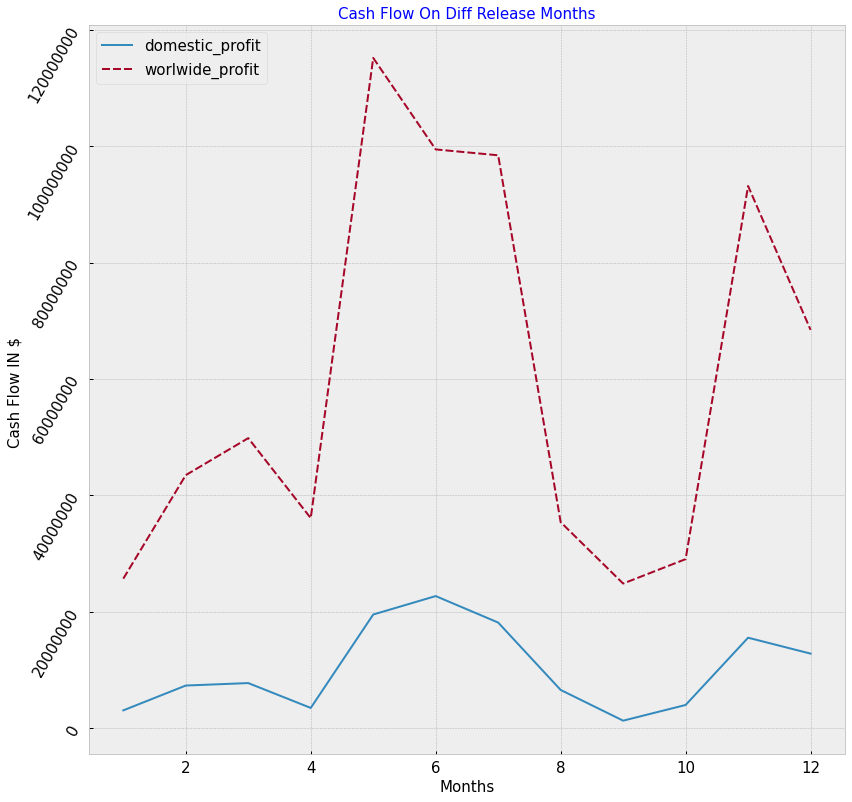

In [87]:
#plt to show the mean of cash flow depending on all the movies release months.

plt.style.use('seaborn-notebook')
plt.style.use('bmh')
fig,ax =plt.subplots(figsize = (15,15)) 

#Ensures the y axis numbers are not displayed in there exponential form
ax.get_yaxis().get_major_formatter().set_scientific(False)

sns.lineplot(data = Budget_monthly)
plt.title('Cash Flow On Diff Release Months',fontsize = 15, color = 'b')
plt.ylabel('Cash Flow IN $ ',fontsize = 15)
plt.xlabel('Months', fontsize = 15)
plt.yticks(rotation = 60,fontsize = 15)
plt.xticks(fontsize = 15)

# Changing color ot text in legend for visibility
leg = plt.legend(loc='upper left',fontsize = 15)
for text in leg.get_texts():
    text.set_color("black")
    
#This adjusts cropping of the graph
plt.subplots_adjust(top=0.8,left = 0.2) 

#saving the plt
ax.figure.savefig('Cash Flow On Diff Release Months.png');


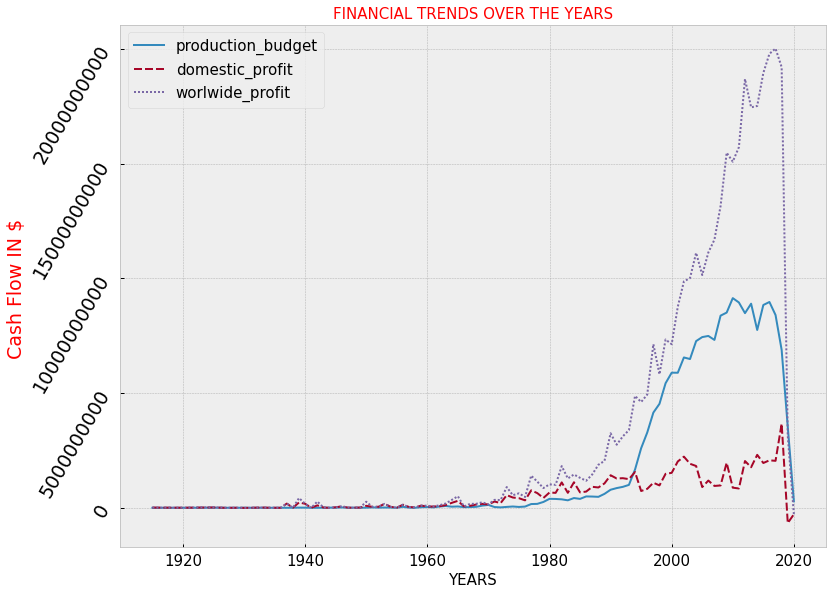

In [88]:
#plt to show what trend of worldwide_gross and domestic gross over the years.summed per year.


plt.style.use('seaborn-notebook')
plt.style.use('bmh')
fig,ax =plt.subplots(figsize = (14,10)) 
ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.lineplot(data = Budget_yearly)
plt.title('FINANCIAL TRENDS OVER THE YEARS',fontsize = 15,color = 'r')
plt.ylabel('Cash Flow IN $ ',fontsize = 19,color = 'r')
plt.xlabel('YEARS', fontsize = 15)
plt.yticks(rotation = 60,fontsize = 19)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 15)
#This adjusts cropping of the graph
plt.subplots_adjust(top=0.85,left = 0.2) 

# Changing color ot text in legend for visibility
leg = plt.legend(loc='upper left',fontsize = 15)
for text in leg.get_texts():
    text.set_color("black")

               
#saving the plt
ax.figure.savefig('FINANCIAL TRENDS OVER THE YEARS.png');

## DATA ANALYSIS OF tmdb.movies



In [89]:
#Making a new dataframe (analise_df) to hold the value_count of 'original_language'
#looking at the bar graph for the top 15 frequency distribution of original languages.

#nlargest limits the rows based on the largest

#getting the frequency of original language occurance in the data.

analise_df = tmdb_df['original_language'].value_counts().nlargest(15)


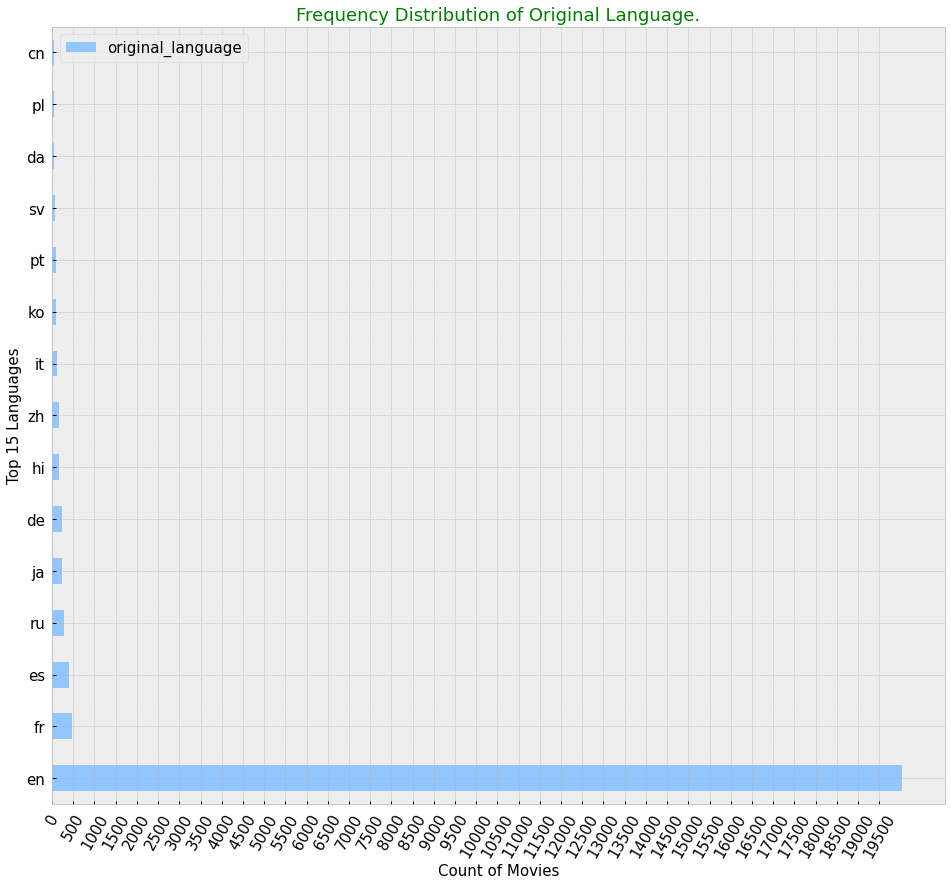

In [90]:
# Making a bargraph to visualise The frequency distribution of movies based on their Original languages.
plt.style.use('seaborn-pastel')
fig,ax = plt.subplots(figsize=(16,16))
analise_df.plot(kind = 'barh')
plt.xlabel('Count of Movies', fontsize = 15)
plt.ylabel('Top 15 Languages', fontsize = 15)
plt.title('Frequency Distribution of Original Language.', fontsize = 18, color = 'g')
plt.yticks(fontsize = 15)
#To make the incremental grids visible to add readability
plt.xticks(range(0,20000,500),fontsize = 15, rotation = 60)

# Changing color ot text in legend for visibility
leg = plt.legend(loc='upper left',fontsize = 15)
for text in leg.get_texts():
    text.set_color("black")
    
#This adjusts cropping of the graph
plt.subplots_adjust(top=0.8);

#save plt for presentation
ax.figure.savefig('Frequency Distribution of Original Language.png')

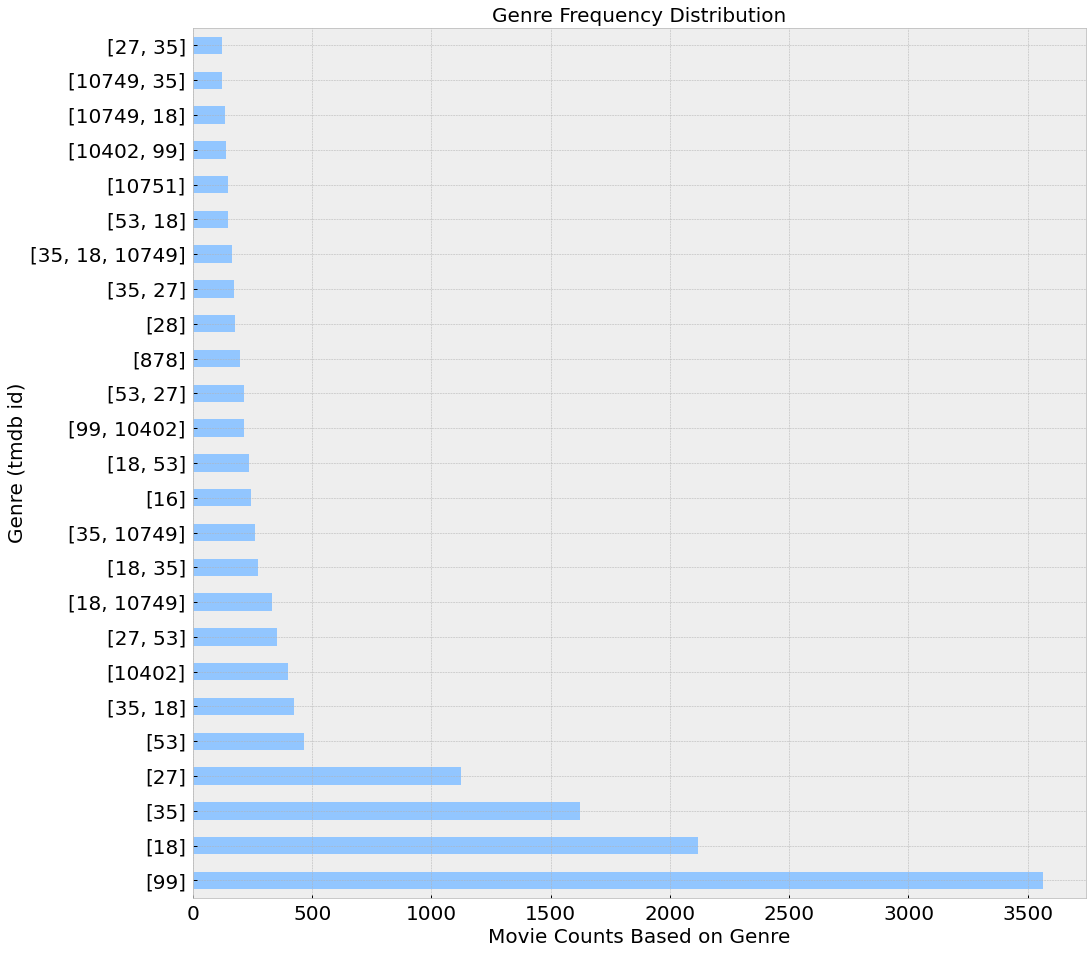

In [91]:
# Making a new variable ,analyse_df2 to hold a the imdb_df but grouped by genre ids followed by a value count
#to get the frequency distribution of various genres.
analyse_df2 = tmdb_df['genre_ids'].value_counts().nlargest(25)


fig,ax = plt.subplots(figsize=(16,16))
analyse_df2.plot(kind = 'barh')
plt.xlabel('Movie Counts Based on Genre', fontsize = 20)
plt.ylabel('Genre (tmdb id)', fontsize = 20)
plt.title('Genre Frequency Distribution', fontsize = 20)
plt.yticks(fontsize = 20)
plt.xticks(fontsize = 20)

#save plt for presentation
ax.figure.savefig('Genre Frequency Distribution.png');

In [92]:
#Introducing another variable 'analyse_df3' to save the tmdb_df which has been groupedby
#original_language and then sumed and sorted by  the sum of popularity.

analyse_df3 = tmdb_df.groupby('original_language').sum().nlargest(15, 'popularity')


In [93]:
analyse_df3

,id,popularity,vote_average,vote_count
original_language,,,,
en,5965885942,65358.018,118880.5,4310126
fr,106790129,2014.987,2901.2,69613
ja,63790796,1322.284,1615.5,40354
es,113744413,1162.910,2580.5,26406
ru,63352043,688.413,1540.8,4739
de,49666040,660.884,1370.7,12337
zh,52629409,632.511,1049.2,5719
hi,38892199,599.721,1014.6,7829
ko,25273453,427.452,623.2,10930


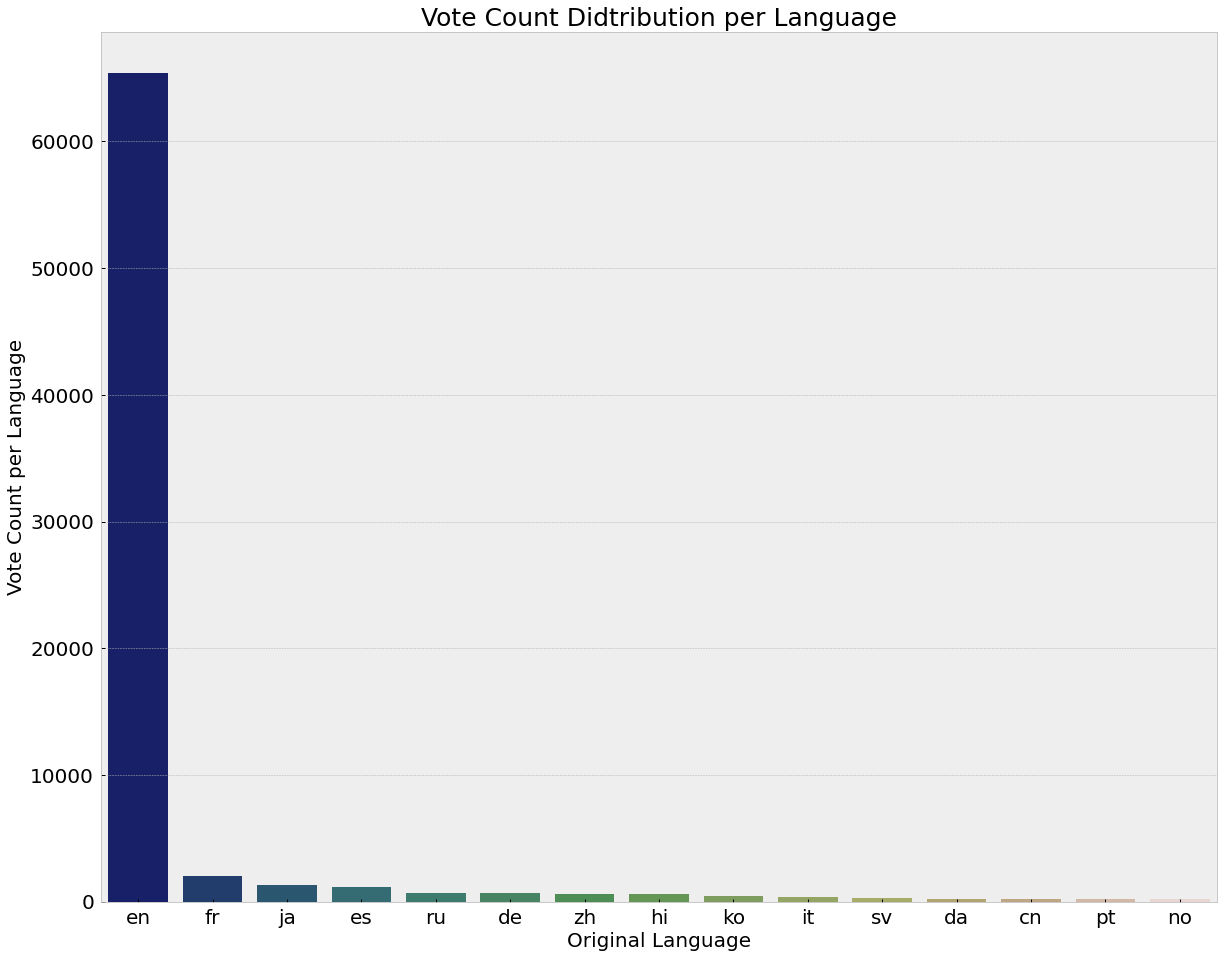

In [94]:
#Making a bargraph for the languages based on the vote count they have recieved.

fig,ax = plt.subplots(figsize=(20,16))
sns.barplot(x = analyse_df3.index, y = analyse_df3['popularity'], palette='gist_earth')

plt.xlabel('Original Language', fontsize = 20)
plt.ylabel('Vote Count per Language', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 20)
plt.title('Vote Count Didtribution per Language', fontsize = 25)

#save plt for presentation
ax.figure.savefig('Vote Count Didtribution per Language');

In [95]:
#Assigning the tmdb_df which has been grouped by genre_id and sumed and sorted by popularity
#as analyse_df4
analyse_df4 = tmdb_df.groupby('genre_ids').sum().nlargest(50, 'popularity')

analyse_df4

,id,popularity,vote_average,vote_count
genre_ids,,,,
[18],593625587,6033.005,13223.2,201294
[99],1124617764,4549.187,24208.2,36694
[35],470535855,4518.355,9597.2,172424
[27],374893115,2398.314,4999.5,44487
"[35, 18]",115179657,1685.699,2644.1,75260
"[27, 53]",92160620,1594.486,1695.8,82877
"[18, 10749]",72415236,1527.800,2040.9,86415
[53],153955594,1186.971,2418.5,18699
"[35, 10749]",52873555,1087.869,1476.7,59471


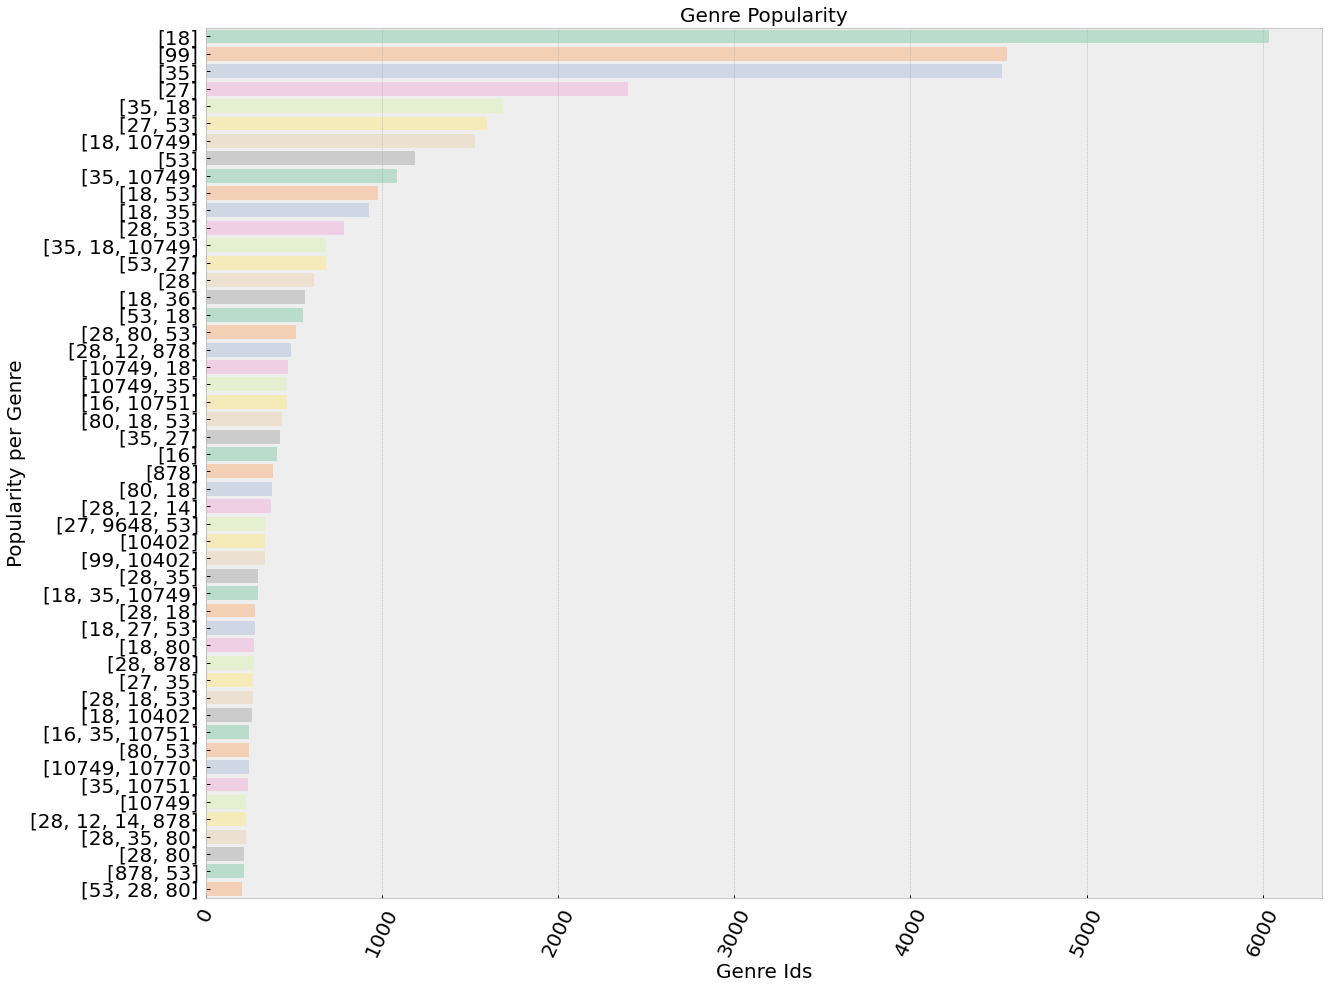

In [96]:
# A bar graph showing The popularity of the varios genre 
fig,ax = plt.subplots(figsize=(20,16))
sns.barplot(y = analyse_df4.index, x = analyse_df4['popularity'], palette='Pastel2')

plt.xlabel('Genre Ids', fontsize = 20)
plt.ylabel('Popularity per Genre', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 65)
plt.yticks(fontsize = 20)
plt.title('Genre Popularity', fontsize = 20)

ax.figure.savefig('Genre Popularity.png');

## ## DATA ANALYSIS OF ```movie_basics```

In [97]:
# grouping data based on genres

movie_b_analysis = movie_basics.groupby('genres').count().nlargest(30, 'movie_id')

movie_b_analysis.head()

,movie_id,primary_title,original_title,start_year,runtime_minutes
genres,,,,,
Documentary,24672,24672,24672,24672,24672
Drama,15725,15725,15725,15725,15725
Comedy,6413,6413,6413,6413,6413
"Comedy,Drama",3163,3163,3163,3163,3163
Horror,2975,2975,2975,2975,2975


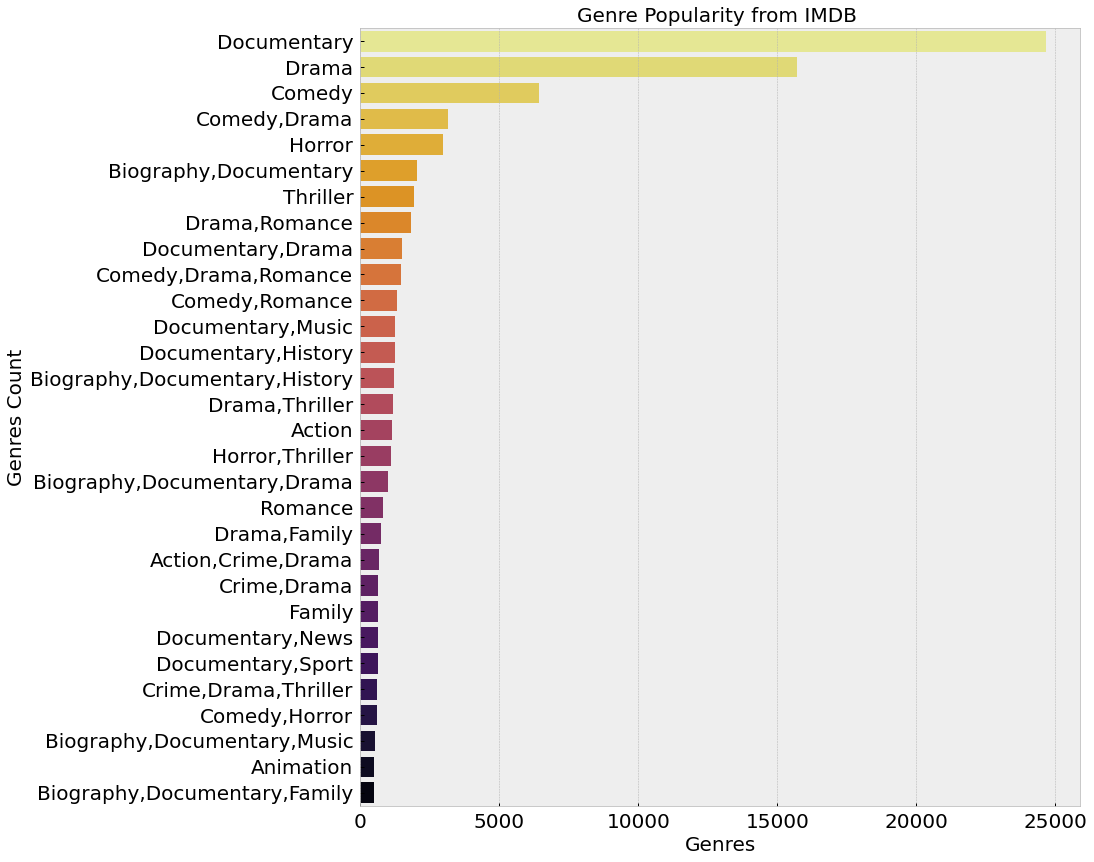

In [98]:
fig,ax = plt.subplots(figsize=(20,16))
sns.barplot(y = movie_b_analysis.index, x = movie_b_analysis['movie_id'], palette='inferno_r')

plt.xlabel('Genres', fontsize = 20)
plt.ylabel('Genres Count', fontsize = 20)
plt.xticks(fontsize = 20, rotation = 0)
plt.yticks(fontsize = 20)
plt.title('Genre Popularity from IMDB ', fontsize = 20)

#This adjusts cropping of the graph
plt.subplots_adjust(top=0.8, left = .4);
ax.figure.savefig('Genre Counts from IMDB.png');

In [99]:
#getting the top 30 genres based on there sum of total votes.

joined_for_sum_of_votes = joined_movie.nlargest(30, 'avg_rates')
joined_for_sum_of_votes.head()


,movie_id,genres,averagerating,numvotes,avg_rates,TTL_votes
905,tt4135932,"Comedy,Documentary,Fantasy",9.4,5,9.4,5
904,tt3856476,"Documentary,Family,Musical",9.3,19,9.3,19
903,tt2896176,Game-Show,9.0,7,9.0,7
900,tt3201538,"Documentary,News,Reality-TV",8.8,8,8.8,8
901,tt4477888,"Documentary,News,Sport",8.8,25,8.8,25


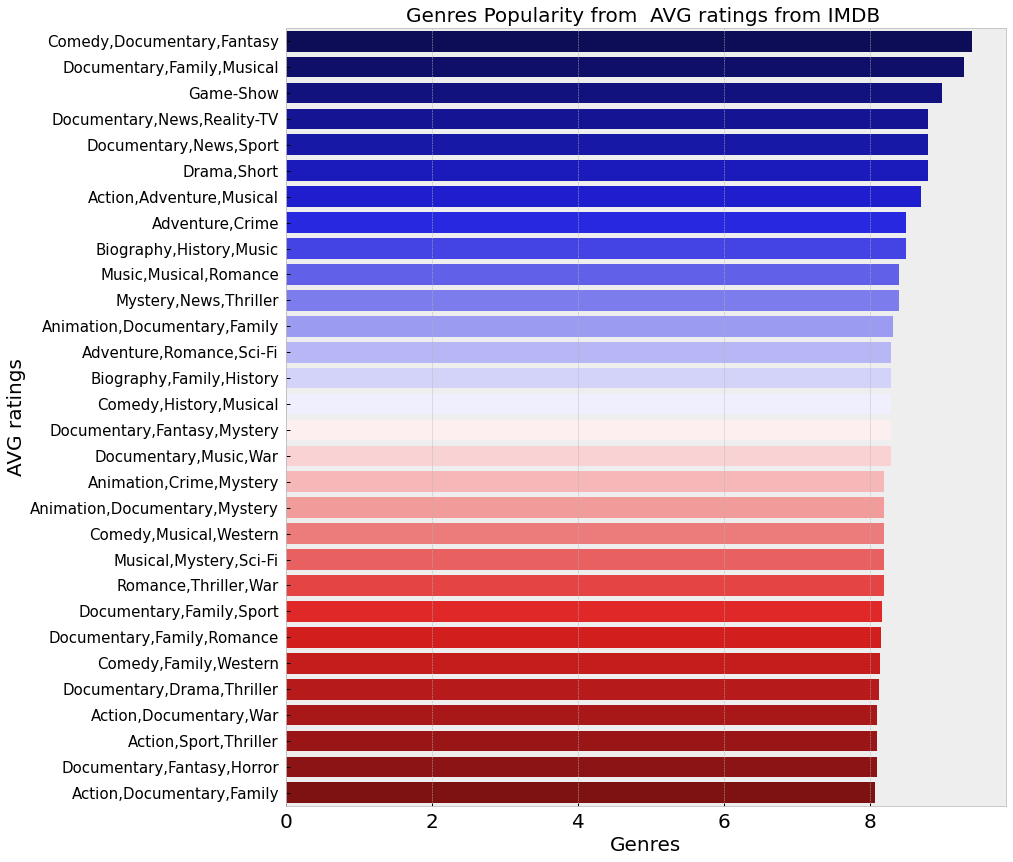

In [100]:
fig,ax = plt.subplots(figsize=(20,16))
sns.barplot(x = joined_for_sum_of_votes['avg_rates'], y = joined_for_sum_of_votes['genres'], palette='seismic')

plt.xlabel('Genres', fontsize = 20)
plt.ylabel('AVG ratings', fontsize = 20)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15,rotation = 0)
plt.title('Genres Popularity from  AVG ratings from IMDB ', fontsize = 20)

#Ensures the y axis numbers are not displayed in there exponential form
ax.get_xaxis().get_major_formatter().set_scientific(False)

#This adjusts cropping of the graph
plt.subplots_adjust(top=0.8, left = .4);
ax.figure.savefig('Genre Popularity from AVG ratings (IMDB).png');

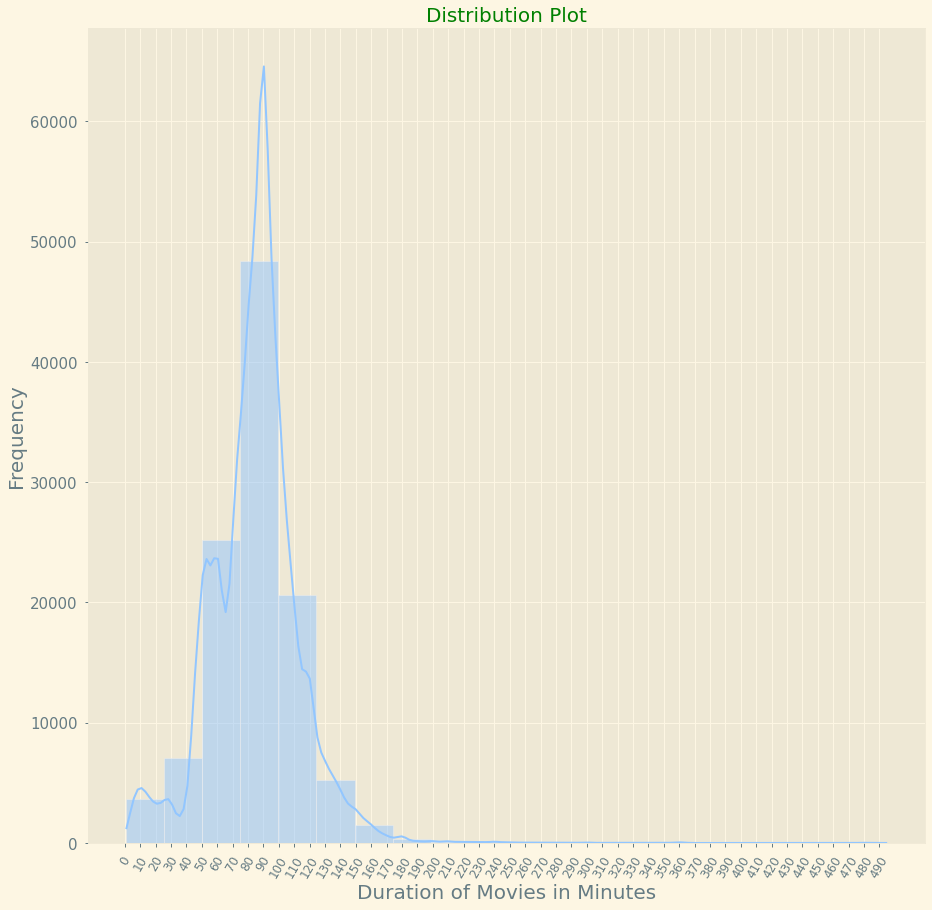

In [101]:

plt.style.use('Solarize_Light2')
plt.figure(figsize = (15,15))
sns.histplot(runtime_movies['runtime_minutes'],bins=20,kde = True)
plt.xticks(range(0,500,10),fontsize = 12, rotation = 60)
plt.yticks(fontsize = 15)
plt.xlabel('Duration of Movies in Minutes',fontsize = 20)
plt.ylabel('Frequency',fontsize = 20)
plt.title('Distribution Plot',fontsize = 20,color = 'g')
plt.show()

ax.figure.savefig('Distribution Plot Of Movie Lenght In Minutes');

-0.03788858926752379


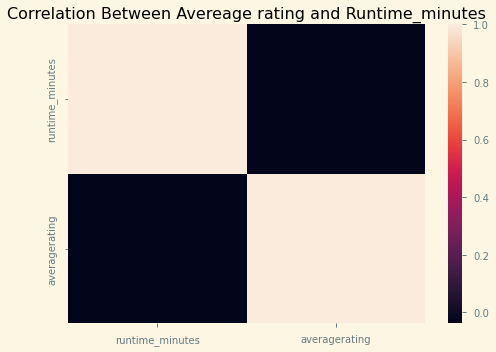

In [102]:
#Correlation between runtime and ratings
Correlation = runtime_corr.corr()
#fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(Correlation);
Correlation_ = Correlation_ = runtime_corr['runtime_minutes'].corr(runtime_corr['averagerating'])
print(Correlation_)
ax.figure.savefig('Correlation between Average rating and Runtime.')
plt.title('Correlation Between Avereage rating and Runtime_minutes');

-0.03788858926752379


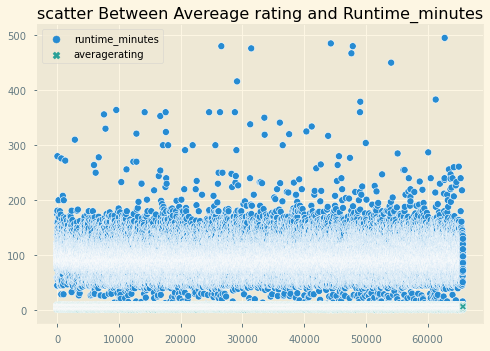

In [103]:
#Correlation between runtime and ratings
Correlation = runtime_corr.corr()
#fig, ax = plt.subplots(figsize = (15,15))
sns.scatterplot(data = runtime_corr);
Correlation_ = Correlation_ = runtime_corr['runtime_minutes'].corr(runtime_corr['averagerating'])
print(Correlation_)
ax.figure.savefig('Correlation between Average rating and Runtime.')
plt.title('scatter Between Avereage rating and Runtime_minutes');

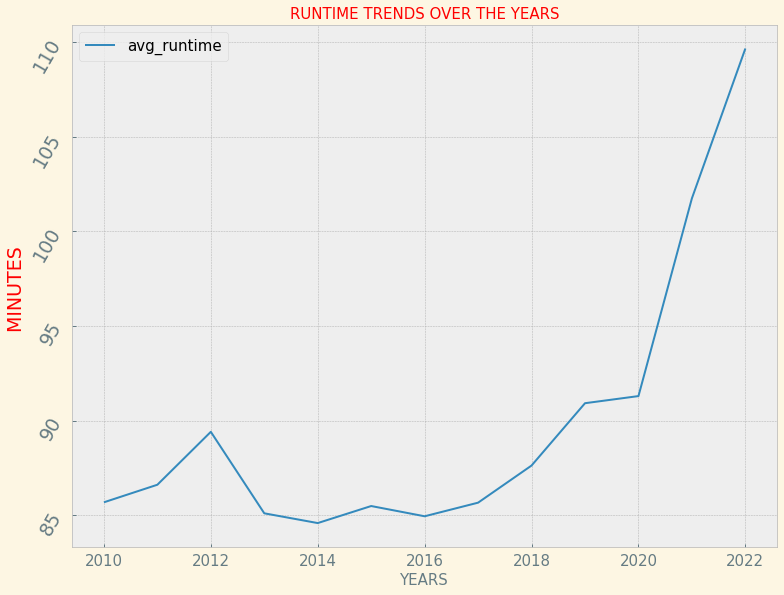

In [104]:
#using yearly_runtime_trends to plot a line plot of runtime fluctuations over the years.

plt.style.use('seaborn-notebook')
plt.style.use('bmh')
fig,ax =plt.subplots(figsize = (14,10)) 
#ax.get_yaxis().get_major_formatter().set_scientific(False)
sns.lineplot(data = yearly_runtime_trends)
plt.title('RUNTIME TRENDS OVER THE YEARS',fontsize = 15,color = 'r')
plt.ylabel('MINUTES ',fontsize = 19,color = 'r')
plt.xlabel('YEARS', fontsize = 15)
plt.yticks(rotation = 60,fontsize = 19)
plt.xticks(fontsize = 15)
plt.legend(fontsize = 15)
#This adjusts cropping of the graph
plt.subplots_adjust(top=0.85,left = 0.2) 

# Changing color ot text in legend for visibility
leg = plt.legend(loc='upper left',fontsize = 15)
for text in leg.get_texts():
    text.set_color("black")

               
#saving the plt
ax.figure.savefig('RUNTIME TRENDS OVER THE YEARS');